In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('kobestats.csv')
df_playoffs = pd.read_csv('kobeplayoffs.csv')
df_combined = pd.concat([df, df_playoffs], ignore_index=True)
df_combined

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,10/28/08,30-066,LAL,NaN,POR,W (+20),1,32:47:00,...,9,11,5,1,0,5,3,23,16.7,17
1,2,2,10/29/08,30-067,LAL,@,LAC,W (+38),1,30:44:00,...,6,8,3,2,0,5,2,16,10.7,23
2,3,3,11/1/08,30-070,LAL,@,DEN,W (+7),1,32:54:00,...,1,4,3,2,0,1,4,33,23.7,13
3,4,4,11/5/08,30-074,LAL,NaN,LAC,W (+18),1,36:20:00,...,1,2,3,2,2,2,3,27,17.6,15
4,5,5,11/9/08,30-078,LAL,NaN,HOU,W (+29),1,32:59:00,...,1,3,3,2,2,4,3,23,16.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,19,19,6/4/09,30-285,LAL,NaN,ORL,W (+25),1,37:58:00,...,7,8,8,2,2,1,1,40,33.0,25
101,20,20,6/7/09,30-288,LAL,NaN,ORL,W (+5),1,48:30:00,...,4,4,8,2,0,7,2,29,17.8,2
102,21,21,6/9/09,30-290,LAL,@,ORL,L (-4),1,40:16:00,...,2,3,8,0,0,4,5,31,16.8,-3
103,22,22,6/11/09,30-292,LAL,@,ORL,W (+8),1,48:52:00,...,6,7,8,1,1,3,3,32,20.3,11


In [3]:
columns_to_drop = ['Age', 'Tm', 'Date', 'Rk', 'G', 'Unnamed: 5', 'Unnamed: 7', 'GS', 'MP', 'GmSc']

# Drop the columns from the combined dataset
df_combined = df_combined.drop(columns=columns_to_drop)
df_combined

,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,POR,9,17,0.529,1,1,1.000,4,5,0.800,2,9,11,5,1,0,5,3,23,17
1,LAC,5,12,0.417,0,2,0.000,6,7,0.857,2,6,8,3,2,0,5,2,16,23
2,DEN,11,24,0.458,1,2,0.500,10,12,0.833,3,1,4,3,2,0,1,4,33,13
3,LAC,8,21,0.381,0,2,0.000,11,14,0.786,1,1,2,3,2,2,2,3,27,15
4,HOU,10,17,0.588,1,2,0.500,2,4,0.500,2,1,3,3,2,2,4,3,23,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,ORL,16,34,0.471,0,1,0.000,8,8,1.000,1,7,8,8,2,2,1,1,40,25
101,ORL,10,22,0.455,1,4,0.250,8,10,0.800,0,4,4,8,2,0,7,2,29,2
102,ORL,11,25,0.440,4,9,0.444,5,10,0.500,1,2,3,8,0,0,4,5,31,-3
103,ORL,11,31,0.355,2,6,0.333,8,8,1.000,1,6,7,8,1,1,3,3,32,11


In [4]:
from sklearn.preprocessing import MinMaxScaler


# Select the numerical columns for normalization
columns_to_normalize = ['FG', 'FGA', 'FG%', '3P', '3PA',
                        '3P%', 'FT', 'FTA', 'FT%', 'ORB',
                        'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                        'PF', 'PTS', '+/-']

# Create a new DataFrame with only the columns to normalize
df_normalized = df_combined[columns_to_normalize].copy()

# Perform Min-Max normalization on the selected columns
scaler = MinMaxScaler()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Assign the normalized columns back to the original DataFrame
df_combined[columns_to_normalize] = df_normalized[columns_to_normalize]

# Print the updated dataset
df_combined


,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,POR,0.333333,0.275862,0.563158,0.166667,0.000000,1.000,0.20,0.25,0.700150,0.4,0.818182,0.846154,0.333333,0.2,0.00,0.714286,0.500000,0.254902,0.725490
1,LAC,0.066667,0.103448,0.366667,0.000000,0.111111,0.000,0.30,0.35,0.785607,0.4,0.545455,0.615385,0.166667,0.4,0.00,0.714286,0.333333,0.117647,0.843137
2,DEN,0.466667,0.517241,0.438596,0.166667,0.111111,0.500,0.50,0.60,0.749625,0.6,0.090909,0.307692,0.166667,0.4,0.00,0.142857,0.666667,0.450980,0.647059
3,LAC,0.266667,0.413793,0.303509,0.000000,0.111111,0.000,0.55,0.70,0.679160,0.2,0.090909,0.153846,0.166667,0.4,0.50,0.285714,0.500000,0.333333,0.686275
4,HOU,0.400000,0.275862,0.666667,0.166667,0.111111,0.500,0.10,0.20,0.250375,0.4,0.090909,0.230769,0.166667,0.4,0.50,0.571429,0.500000,0.254902,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,ORL,0.800000,0.862069,0.461404,0.000000,0.000000,0.000,0.40,0.40,1.000000,0.2,0.636364,0.615385,0.583333,0.4,0.50,0.142857,0.166667,0.588235,0.882353
101,ORL,0.400000,0.448276,0.433333,0.166667,0.333333,0.250,0.40,0.50,0.700150,0.0,0.363636,0.307692,0.583333,0.4,0.00,1.000000,0.333333,0.372549,0.431373
102,ORL,0.466667,0.551724,0.407018,0.666667,0.888889,0.444,0.25,0.50,0.250375,0.2,0.181818,0.230769,0.583333,0.0,0.00,0.571429,0.833333,0.411765,0.333333
103,ORL,0.466667,0.758621,0.257895,0.333333,0.555556,0.333,0.40,0.40,1.000000,0.2,0.545455,0.538462,0.583333,0.2,0.25,0.428571,0.500000,0.431373,0.607843


In [5]:
df_combined = df_combined.dropna()
df_combined

,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,POR,0.333333,0.275862,0.563158,0.166667,0.000000,1.000,0.20,0.25,0.700150,0.4,0.818182,0.846154,0.333333,0.2,0.00,0.714286,0.500000,0.254902,0.725490
1,LAC,0.066667,0.103448,0.366667,0.000000,0.111111,0.000,0.30,0.35,0.785607,0.4,0.545455,0.615385,0.166667,0.4,0.00,0.714286,0.333333,0.117647,0.843137
2,DEN,0.466667,0.517241,0.438596,0.166667,0.111111,0.500,0.50,0.60,0.749625,0.6,0.090909,0.307692,0.166667,0.4,0.00,0.142857,0.666667,0.450980,0.647059
3,LAC,0.266667,0.413793,0.303509,0.000000,0.111111,0.000,0.55,0.70,0.679160,0.2,0.090909,0.153846,0.166667,0.4,0.50,0.285714,0.500000,0.333333,0.686275
4,HOU,0.400000,0.275862,0.666667,0.166667,0.111111,0.500,0.10,0.20,0.250375,0.4,0.090909,0.230769,0.166667,0.4,0.50,0.571429,0.500000,0.254902,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,ORL,0.800000,0.862069,0.461404,0.000000,0.000000,0.000,0.40,0.40,1.000000,0.2,0.636364,0.615385,0.583333,0.4,0.50,0.142857,0.166667,0.588235,0.882353
101,ORL,0.400000,0.448276,0.433333,0.166667,0.333333,0.250,0.40,0.50,0.700150,0.0,0.363636,0.307692,0.583333,0.4,0.00,1.000000,0.333333,0.372549,0.431373
102,ORL,0.466667,0.551724,0.407018,0.666667,0.888889,0.444,0.25,0.50,0.250375,0.2,0.181818,0.230769,0.583333,0.0,0.00,0.571429,0.833333,0.411765,0.333333
103,ORL,0.466667,0.758621,0.257895,0.333333,0.555556,0.333,0.40,0.40,1.000000,0.2,0.545455,0.538462,0.583333,0.2,0.25,0.428571,0.500000,0.431373,0.607843


Epoch 1/5000, Loss: 0.0685
Reconstruction Loss: 0.0688
Epoch 2/5000, Loss: 0.0679
Reconstruction Loss: 0.0686
Epoch 3/5000, Loss: 0.0685
Reconstruction Loss: 0.0685
Epoch 4/5000, Loss: 0.0696
Reconstruction Loss: 0.0683
Epoch 5/5000, Loss: 0.0699
Reconstruction Loss: 0.0682
Epoch 6/5000, Loss: 0.0678
Reconstruction Loss: 0.0681
Epoch 7/5000, Loss: 0.0682
Reconstruction Loss: 0.0679
Epoch 8/5000, Loss: 0.0669
Reconstruction Loss: 0.0678
Epoch 9/5000, Loss: 0.0676
Reconstruction Loss: 0.0676
Epoch 10/5000, Loss: 0.0685
Reconstruction Loss: 0.0675
Epoch 11/5000, Loss: 0.0672
Reconstruction Loss: 0.0674
Epoch 12/5000, Loss: 0.0696
Reconstruction Loss: 0.0672
Epoch 13/5000, Loss: 0.0674
Reconstruction Loss: 0.0671
Epoch 14/5000, Loss: 0.0667
Reconstruction Loss: 0.0670
Epoch 15/5000, Loss: 0.0659
Reconstruction Loss: 0.0668
Epoch 16/5000, Loss: 0.0663
Reconstruction Loss: 0.0667
Epoch 17/5000, Loss: 0.0675
Reconstruction Loss: 0.0666
Epoch 18/5000, Loss: 0.0673
Reconstruction Loss: 0.0664
E

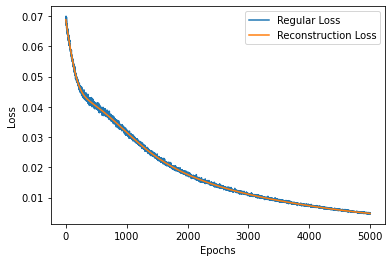

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Exclude non-numeric columns from the input data
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns
data = df_combined[numeric_columns].values.astype(np.float32)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the dimensions of the encoding and decoding layers
encoding_dim = 15

# Create a custom autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(data.shape[1], encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, data.shape[1]),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create an instance of the autoencoder model
autoencoder = Autoencoder(encoding_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0001)

# Convert the data to PyTorch tensors
train_tensor = torch.from_numpy(train_data)
test_tensor = torch.from_numpy(test_data)

# Train the autoencoder model
num_epochs = 5000
batch_size = 32

# Store the loss values for each epoch
loss_values = []
reconstruction_loss_values = []

for epoch in range(num_epochs):
    # Create random mini-batches
    indices = torch.randperm(train_tensor.size(0))
    mini_batches = torch.split(indices, batch_size)
    
    # Monitor training and validation loss
    total_loss = 0.0
    
    # Train the model for each mini-batch
    for mini_batch in mini_batches:
        inputs = train_tensor[mini_batch]
        
        # Forward pass
        outputs = autoencoder(inputs)
        
        # Compute the loss
        loss = criterion(outputs, inputs)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate the loss
        total_loss += loss.item()
    
    # Compute the average loss for the epoch
    avg_loss = total_loss / len(mini_batches)
    
    # Store the regular loss values
    loss_values.append(avg_loss)
    
    # Reconstruction loss (MSE) calculation
    with torch.no_grad():
        reconstructed_outputs = autoencoder(train_tensor)
        reconstruction_loss = criterion(reconstructed_outputs, train_tensor)
        reconstruction_loss_values.append(reconstruction_loss.item())

    # Print the average loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
    print(f"Reconstruction Loss: {reconstruction_loss.item():.4f}")

# Get the encoded representations of the input data
encoded_train_data = autoencoder.encoder(train_tensor).detach().numpy()
encoded_test_data = autoencoder.encoder(test_tensor).detach().numpy()

# Print the encoded representations
print(encoded_train_data)
print(encoded_test_data)

# Plot the loss values
epochs = range(1, num_epochs+1)

plt.plot(epochs, loss_values, label='Regular Loss')
plt.plot(epochs, reconstruction_loss_values, label='Reconstruction Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


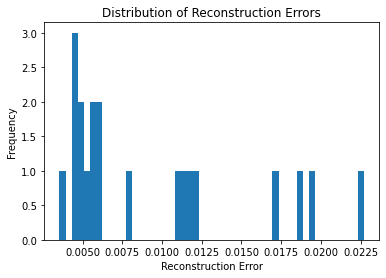

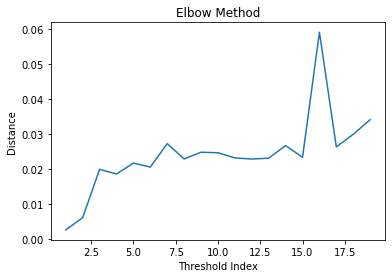

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


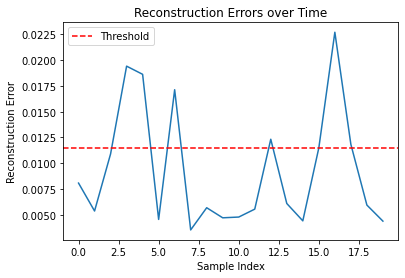

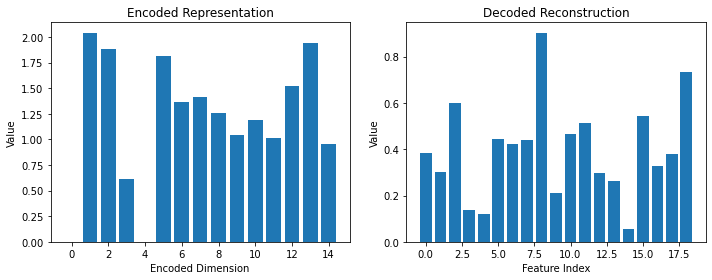

In [8]:
# Calculate reconstruction errors for the testing set
with torch.no_grad():
    reconstructed_test = autoencoder(test_tensor)
    test_errors = torch.mean((reconstructed_test - test_tensor) ** 2, dim=1)

# Plot a histogram of the reconstruction errors
plt.hist(test_errors.numpy(), bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors')
plt.show()

# Determine the threshold using the elbow method
errors_np = test_errors.numpy()
distances = []
for i in range(1, len(errors_np)):
    dist = np.sqrt(np.sum((errors_np[i] - errors_np[:i]) ** 2))
    distances.append(dist)
    
# Plot the distances to find the elbow point
plt.plot(range(1, len(errors_np)), distances)
plt.xlabel('Threshold Index')
plt.ylabel('Distance')
plt.title('Elbow Method')
plt.show()

# Set the threshold based on the elbow point
threshold_index = np.argmax(distances)
threshold = errors_np[threshold_index]

# Gather the instances where model detected an anomaly
anomaly_indices = np.where(test_errors > threshold)[0]

# Evaluation metrics
true_labels = np.zeros(len(test_data))
true_labels[anomaly_indices] = 1

predicted_labels = np.zeros(len(test_data))
predicted_labels[np.where(test_errors > threshold)[0]] = 1

# Calculate evaluation metrics
accuracy = np.mean(predicted_labels == true_labels)
precision = np.sum((predicted_labels == 1) & (true_labels == 1)) / np.sum(predicted_labels == 1)
recall = np.sum((predicted_labels == 1) & (true_labels == 1)) / np.sum(true_labels == 1)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Visualization: Plot the reconstruction errors over time
plt.plot(range(len(test_data)), test_errors.numpy())
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors over Time')
plt.legend()
plt.show()

# Visualize the encoded representations and decoded reconstructions
encoded_test = autoencoder.encoder(test_tensor)
decoded_test = autoencoder.decoder(encoded_test)

# Plot a random sample's encoded representation and its corresponding decoded reconstruction
sample_index = np.random.randint(len(test_data))
sample_encoded = encoded_test[sample_index].detach().numpy()
sample_decoded = decoded_test[sample_index].detach().numpy()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(encoding_dim), sample_encoded)
plt.xlabel('Encoded Dimension')
plt.ylabel('Value')
plt.title('Encoded Representation')

plt.subplot(1, 2, 2)
plt.bar(range(len(test_data[0])), sample_decoded)
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.title('Decoded Reconstruction')

plt.tight_layout()
plt.show()

In [25]:
train_indices = np.arange(len(data))[np.isin(data, train_data).all(axis=1)]
test_indices = np.arange(len(data))[np.isin(data, test_data).all(axis=1)]

print("Training data indices:", train_indices)
print("Testing data indices:", test_indices)

Training data indices: [ 1  2  3  4  5  6  7  8  9 11 13 14 15 16 17 19 20 21 23 24 25 26 27 28
 29 32 34 35 36 37 38 40 41 42 43 46 47 48 49 50 51 52 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Testing data indices: [ 0  4  5 10 12 18 22 23 30 31 33 39 44 45 48 53 70 73 76 77 80 83 90]


In [27]:
# Get the indices of the samples in test_data
test_indices = np.arange(len(data))[np.isin(data, test_data).all(axis=1)]

# Get the game information for testing data
test_games = df_combined.iloc[test_indices]

print("Testing data:")
print(test_games)

Testing data:
    Opp        FG       FGA       FG%        3P       3PA    3P%    FT   FTA  \
0   POR  0.333333  0.275862  0.563158  0.166667  0.000000  1.000  0.20  0.25   
4   HOU  0.400000  0.275862  0.666667  0.166667  0.111111  0.500  0.10  0.20   
5   DAL  0.400000  0.379310  0.512281  0.000000  0.111111  0.000  0.35  0.40   
11  SAC  0.400000  0.379310  0.512281  0.000000  0.000000  0.000  0.20  0.20   
13  DAL  0.666667  0.586207  0.578947  0.166667  0.333333  0.250  0.30  0.30   
19  SAC  0.333333  0.551724  0.266667  0.500000  0.777778  0.375  0.35  0.35   
23  NYK  0.533333  0.448276  0.591228  0.166667  0.222222  0.333  0.15  0.20   
24  MIA  0.533333  0.517241  0.512281  0.166667  0.222222  0.333  0.15  0.20   
32  NOH  0.666667  0.448276  0.750877  1.000000  0.666667  0.857  0.25  0.30   
33  GSW  0.333333  0.379310  0.424561  0.333333  0.444444  0.400  0.05  0.05   
35  MIA  0.066667  0.172414  0.261404  0.333333  0.333333  0.500  0.35  0.35   
41  WAS  0.000000  0.06896